# Method Comparison
The following contains a simple method comparison for the blog post on blog.inovex.de about different learners. It uses the synthetic dataset designed in my thesis to show the strengths and weaknesses of single learners. 

In [9]:
import justcause as jc 
from sklearn.linear_model import LinearRegression
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")
plt.rcParams["axes.labelsize"] = 10
plt.rcParams["figure.facecolor"] = "1"
plt.rcParams["grid.color"] = "black"
plt.rcParams["grid.linestyle"] = ":"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["figure.figsize"] = (10,10)


sns.set_style("whitegrid")
sns.set_context("poster")


CYAN = "#4ECDC4"
BLUE = "#59D2FE"
RED = "#FF6B6B"
YELLOW = "#FAA916"
GREY = "#4A6670"

## Multi-Modal Setting
First, we generate the synthetic data described as multi-modal setting based on the IHDP covariates. In *JustCause*, this DGP is already implemented, as it was part of my thesis evaluation. Thus, we can simply load the desired number of replications. We choose 100, in order to flat out sample errors. 

Text(0.5,1,'MULTI setting')

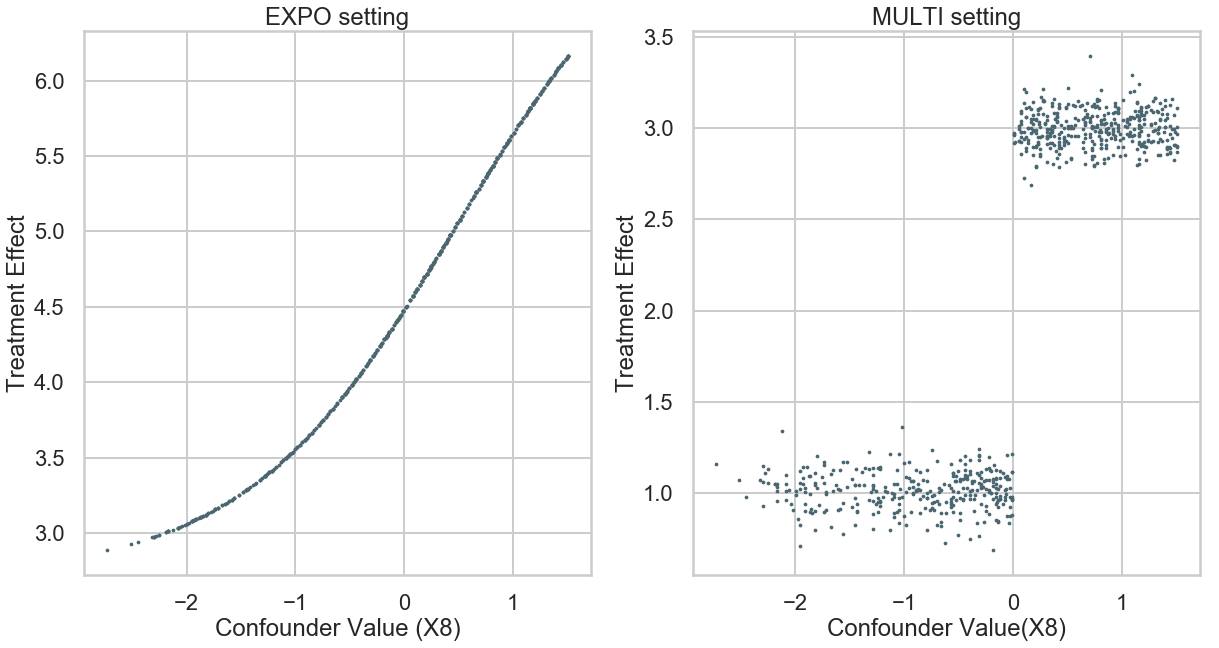

In [10]:
# Load a list of 100 replications
multi = jc.data.generators.multi_expo_on_ihdp(setting='multi-modal', n_replications=100)
expo = jc.data.generators.multi_expo_on_ihdp(setting='exponential', n_replications=100)

# Look at one replication
rep_exp = expo[0]
rep = multi[0]

fg, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.scatter(rep_exp.np.X[:, 0], rep_exp.np.ite, s=3, color=GREY)
ax2.scatter(rep.np.X[:, 0], rep.np.ite, s=3, color=GREY)
ax1.set_xlabel('Confounder Value (X8)')
ax1.set_ylabel('Treatment Effect')
ax2.set_xlabel('Confounder Value(X8)')
ax2.set_ylabel('Treatment Effect')
ax1.set_title('EXPO setting')
ax2.set_title('MULTI setting')



In [6]:
learners = [jc.learners.SLearner(LinearRegression()), jc.learners.TLearner(LinearRegression())]

In [9]:
from justcause.evaluation import evaluate_ite
from justcause.metrics import pehe_score, mean_absolute, bias

results = evaluate_ite(multi, learners, metrics=[pehe_score, mean_absolute, bias], random_state=0)

In [10]:
pd.DataFrame(results).sort_values('pehe_score-mean')

,pehe_score-mean,pehe_score-median,pehe_score-std,mean_absolute-mean,mean_absolute-median,mean_absolute-std,bias-mean,bias-median,bias-std,method,train
2,0.582007,0.580839,0.011198,0.035678,0.026728,0.027394,-0.021745,-0.021332,0.039377,"TLearner(control=LinearRegression, treated=Lin...",True
3,0.582007,0.580839,0.011198,0.035678,0.026728,0.027394,-0.021745,-0.021332,0.039377,"TLearner(control=LinearRegression, treated=Lin...",False
0,1.005002,1.004523,0.005423,0.075103,0.074464,0.043866,0.072907,0.074464,0.047425,SLearner(learner=LinearRegression),True
1,1.005002,1.004523,0.005423,0.075103,0.074464,0.043866,0.072907,0.074464,0.047425,SLearner(learner=LinearRegression),False


## Exponential Setting
The second evaluation is based on a slightly different DGP, which does not contain the two distinct treatment groups.

In [12]:
results = evaluate_ite(expo, learners, metrics=[pehe_score, mean_absolute, bias], random_state=0)

In [13]:
pd.DataFrame(results).sort_values('pehe_score-mean')

,pehe_score-mean,pehe_score-median,pehe_score-std,mean_absolute-mean,mean_absolute-median,mean_absolute-std,bias-mean,bias-median,bias-std,method,train
2,0.195430,0.195456,0.014095,0.032996,0.033373,0.017392,-0.031170,-0.033268,0.020485,"TLearner(control=LinearRegression, treated=Lin...",True
3,0.195430,0.195456,0.014095,0.032996,0.033373,0.017392,-0.031170,-0.033268,0.020485,"TLearner(control=LinearRegression, treated=Lin...",False
0,0.944831,0.944136,0.003255,0.066809,0.067539,0.037706,0.063823,0.067539,0.042566,SLearner(learner=LinearRegression),True
1,0.944831,0.944136,0.003255,0.066809,0.067539,0.037706,0.063823,0.067539,0.042566,SLearner(learner=LinearRegression),False
